In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = 1 / Z_{n} - Z^{n * Z^{p(n)^{n}} / \sqrt(\pi)}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# figure of a bug? or bug of a figure? a numerical discovery.

    Sequential iteration of difference equation:
    Z = 1/Z - Z^( n*Z^(p(n)^n )/k);
    with parameter set:
    p = [-0.851612290000, -1.794358160000, -4.450415130000]
    on the complex plane produces a bug like figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import SVG
from IPython.display import Image
from IPython.display import display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as ip

sys.path.insert(1, '../src');   import z_plane as zp
import graphic_utility as gu;   import itergataters as ig

In [3]:
def bugga_bear(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    EPSILON = 1e-15
    for n in range(1, len(p)+1):
        if np.abs(Z) != 0:
            Z = 1 / Z - Z**( n * (Z**( p[n-1]**n )) / np.sqrt(np.pi))
        else:
            Z = 1 / EPSILON - Z**( n * (Z**( p[n-1]**n )) / np.sqrt(np.pi))
    return Z

In [4]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -20.0 + 0.0*1j
par_set['theta'] = -1 * np.pi/2
par_set['zoom'] = 0.035

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(bugga_bear, ([-0.851612290000, -1.794358160000, -4.450415130000]))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

38.115885972976685 	 total time


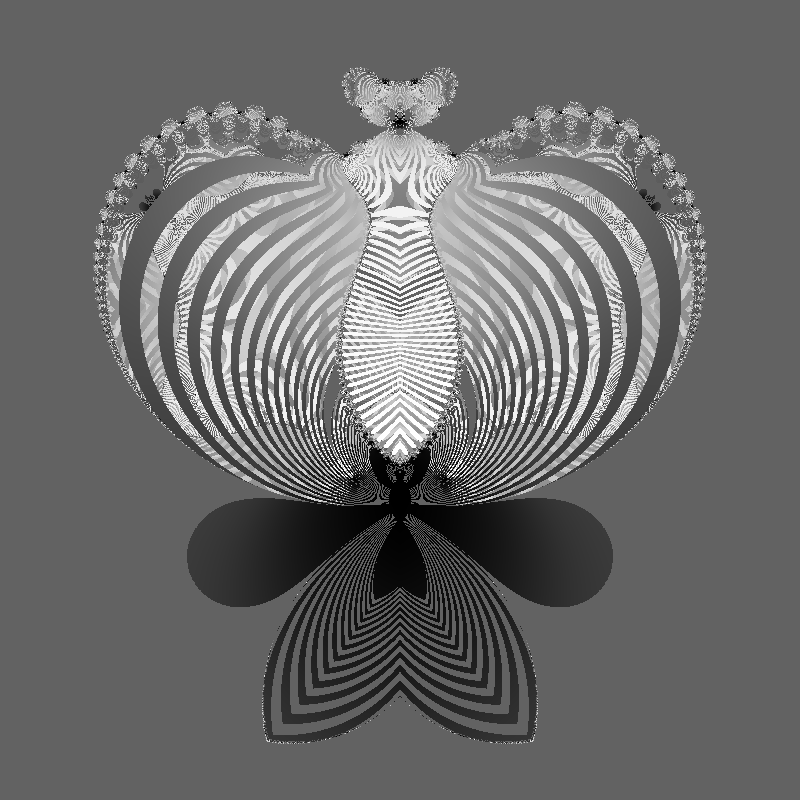

In [5]:
Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))

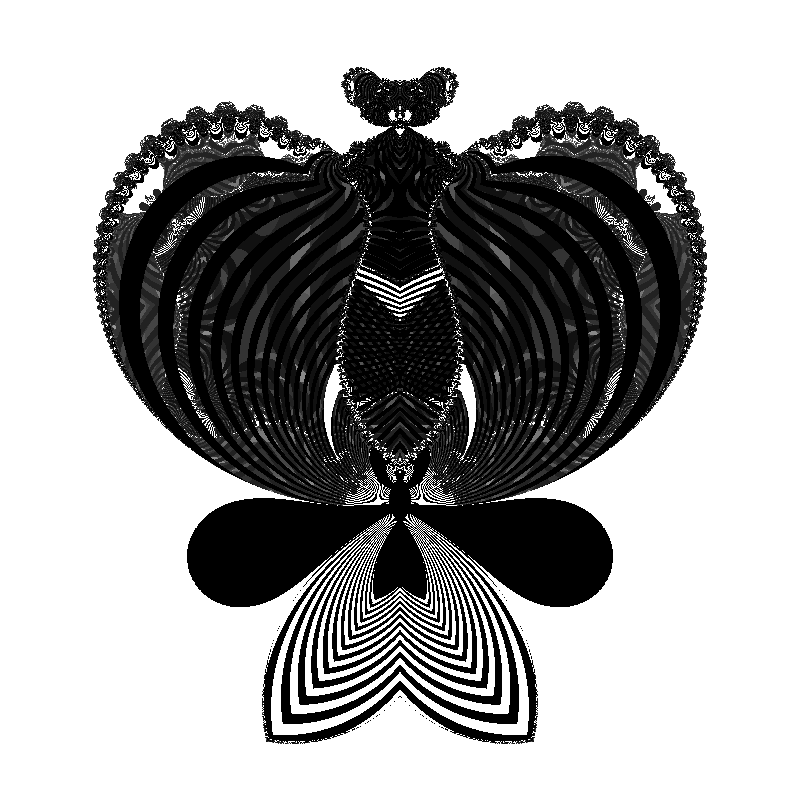

In [5]:
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

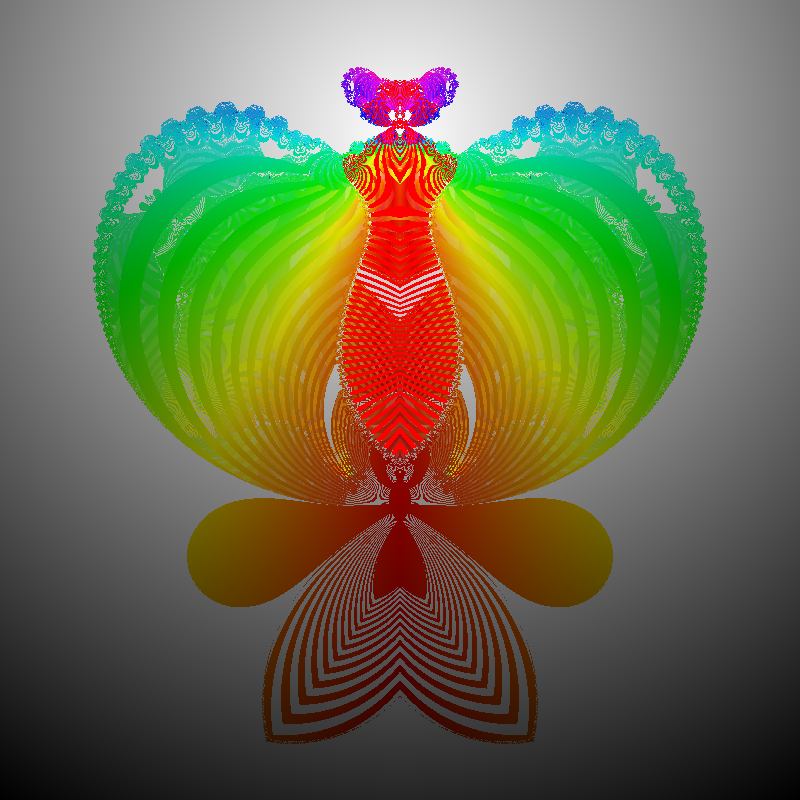

In [6]:
Ic = gu.Z_ET_to_show((Z-Z0), ET)
display(Ic)